인코딩 관련

윈도우 cp949

[ 데이터 분석과 시각화 - 자동차 연비 원인 분석 ]


In [130]:
# 데이터셋 : auto_mpg.csv
# 타겟/라벨 : mpg
# 피쳐/속성 : mpg컬럼을 제외한 나머지 => 탐색적 분석을 통해서 주요 특성 선택 


# [1-1] 모듈 로딩

import pandas as pd      # 데이터 분석 및 전처리용 모듈
import numpy as np       # 배열을 지원하는 파이썬 패키지
import matplotlib.pyplot as plt  # 데이터 시각화, 그래프 관련 모듈 
import matplotlib

import utils # 사용자 정의 함수

In [131]:
# [1-2] 데이터 준비 
D_FILE='../DATA/auto_mpg.csv'
mpgDF=pd.read_csv(D_FILE)
# 이렇게 생성된 raw 데이터

[ 데이터 확인 ]

In [132]:
# 데이터 요약 정보 확인 
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [133]:
# horsepower 타입 불일치 
# 데이터 특성 체크 : cylinders, origin (이 두가지는 수치형으로 예측됨)

# 실제 데이터 확인
mpgDF.head(2)

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320

In [134]:
# 컬럼별 통계치 : 데이터 분포 
mpgDF.describe()

# 평균, 중앙값, 표준편차 등을 확인해야 함 

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

In [135]:
# 결측값과 특이값(이상 수치) 찾아내기 
# 함수를 만들어서 하면 편하다.

# 컬럼별 고유값을 통해 특이값 사전 체크 가능 
# Series.unique()

print(mpgDF['mpg'].nunique()) # 고유값 갯수
print(mpgDF['mpg'].unique()) # 고유값

129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [136]:
# 컬럼별 고유값 체크
# 함수 호출
utils.check_unique(mpgDF)

[ mpg의 고유값 ]
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

[ cylinders의 고유값 ]
[8 4 6 3 5]

[ displacement의 고유값 ]
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.  

In [137]:
# 속성명, 메서드명 리스트 확인
# 내부에 __iter__가 있으면 for ~ in 가능한 객체 / 인스턴스 
mpgDF.columns.__dir__()

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accesso

In [138]:
# 데이터 특성 타입 변환 (수치형이냐 범주형이냐) : origin, cylinder
# 데이터 값 타입 일치 : horsepower - int가 아닌 object 타입으로 저장되어 있었음
# 이상치 / 특이값 처리 : horsepower - ? 라는 이상치가 존재
# 데이터 단위 변환 : mpg 컬럼 -> km/l 컬럼 추가

[ 데이터 전처리 ]

In [139]:
# 결측치 확인
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [140]:
# 이상치 처리

# 방법 1 : ? 행 삭제
sr1=mpgDF['horsepower'].value_counts()
boolidx=mpgDF['horsepower']=='?' #불린 인덱스 
mpgDF[boolidx]

# inplace를 안쓰면 저장이 안됨
new_mpgDF=mpgDF.drop(index=mpgDF[boolidx].index)

In [141]:
# 방법 2 : ?가 들어 있는 행 결측치로 변경
new_mpgDF_2=mpgDF.replace('?',np.nan)
new_mpgDF_2.isna().sum()

# 결측치 삭제
new_mpgDF_2.dropna(inplace=True)
new_mpgDF_2

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[392 rows x 9 columns]

In [142]:
# 타입 변경
new_mpgDF_2['horsepower']=new_mpgDF_2['horsepower'].astype('int') # int로 타입 변경
new_mpgDF_2.dtypes # 모든 타입 확인 

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [143]:
# 데이터 특성 타입 변환
new_mpgDF_2['origin']=new_mpgDF_2['origin'].astype('category')
new_mpgDF_2['cylinders']=new_mpgDF_2['cylinders'].astype('category')
new_mpgDF_2['model year']=new_mpgDF_2['model year'].astype('category')

In [144]:
# mpg 컬럼의 단위를 km/l로 변환 데이터 생성 후 컬럼 추가 
# mpg*0.425 => km/l

new_mpgDF_2['mpg_km/l']=new_mpgDF_2['mpg']*0.425
new_mpgDF_2.head(2)

mpg cylinders  displacement  horsepower  weight  acceleration model year  \
0  18.0         8         307.0         130    3504          12.0         70   
1  15.0         8         350.0         165    3693          11.5         70   

  origin                   car name  mpg_km/l  
0      1  chevrolet chevelle malibu     7.650  
1      1          buick skylark 320     6.375

In [145]:
# mpg 컬럼 삭제 
new_mpgDF_2.drop(columns=['mpg'],inplace=True)
new_mpgDF_2.head(2)

print(new_mpgDF_2.shape)
new_mpgDF_2.reset_index(drop=True)

(392, 9)


cylinders  displacement  horsepower  weight  acceleration model year  \
0           8         307.0         130    3504          12.0         70   
1           8         350.0         165    3693          11.5         70   
2           8         318.0         150    3436          11.0         70   
3           8         304.0         150    3433          12.0         70   
4           8         302.0         140    3449          10.5         70   
..        ...           ...         ...     ...           ...        ...   
387         4         140.0          86    2790          15.6         82   
388         4          97.0          52    2130          24.6         82   
389         4         135.0          84    2295          11.6         82   
390         4         120.0          79    2625          18.6         82   
391         4         119.0          82    2720          19.4         82   

    origin                   car name  mpg_km/l  
0        1  chevrolet chevelle malibu     7.650  
1        1          buick skylark 320     6.375  
2        1         plymouth satellite     7.650  
3        1              amc rebel sst     6.800  
4        1                ford torino     7.225  
..     ...                        ...       ...  
387      1            ford mustang gl    11.475  
388      2                  vw pickup    18.700  
389      1              dodge rampage    13.600  
390      1                ford ranger    11.900  
391      1                 chevy s-10    13.175  

[392 rows x 9 columns]

[ 시각화 ]

(392,) (392,)


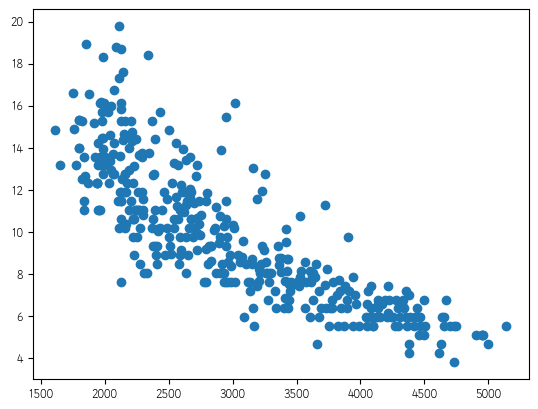

In [146]:
# 연비와 무게의 관계 시각화
xdata=new_mpgDF_2['weight']
ydata=new_mpgDF_2['mpg_km/l']
print(xdata.shape, ydata.shape) # 갯수가 맞는지 확인하기 
plt.plot(xdata,ydata,'o')
plt.show()

In [147]:
# 한글 폰트 설정
# 모듈 불러오기
import matplotlib.font_manager

# 사용하고 싶은 폰트 가져오기
kor_font=r'C:/Users/knudc/AppData/Local/Microsoft/Windows/Fonts/강원교육모두 Bold.ttf'
font_name=matplotlib.font_manager.FontProperties(fname=kor_font).get_name()

# 폰트 설정하기
matplotlib.rc('font',family=font_name)

(392,) (392,)


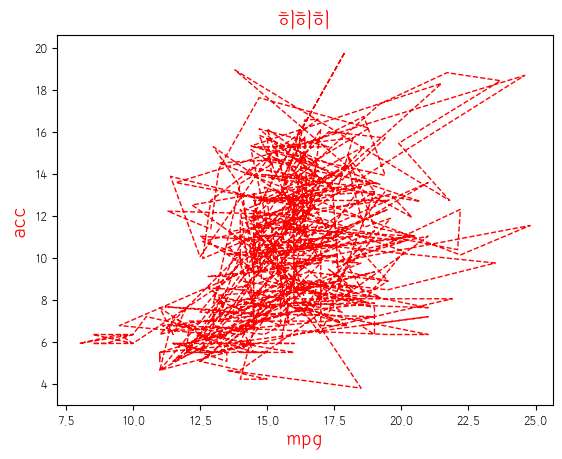

In [151]:
# 연비와 가속력의 관계 시각화
xdata=new_mpgDF_2['acceleration']
ydata=new_mpgDF_2['mpg_km/l']
print(xdata.shape, ydata.shape) # 갯수가 맞는지 확인하기 
plt.plot(xdata,ydata,'r--',linewidth=1.0)
plt.title('히히히', fontdict={'color':'r','size':'xx-large'})
plt.xlabel('mpg',fontdict={'color':'r','size':'xx-large'})
plt.ylabel('acc',fontdict={'color':'r','size':'xx-large'})
plt.xticks()
plt.show()

In [149]:
# 상관계수 
col_names=new_mpgDF_2.columns.drop('car name')
corrDF=new_mpgDF_2[col_names].corr()
corrDF

corrDF['mpg_km/l'].sort_values()[:-1]

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
Name: mpg_km/l, dtype: float64

In [150]:
# 결론 도출
# 무게와 배기량과 실린더량이 연비에 영향을 많이 미치는 것으로 나타났다.
# 모델 연식도 나름의 연관성이 있었다.